**Logistic regression is considered as a linear model, so we deal first with the first equation (below) of alpha (alpha = wx + b) to associate with each feature and weight**

**The second step is to put the weight and feature's equation in a link function (sigmoid function) which map predicted values to probabilities**

***This is an example of the first two steps***

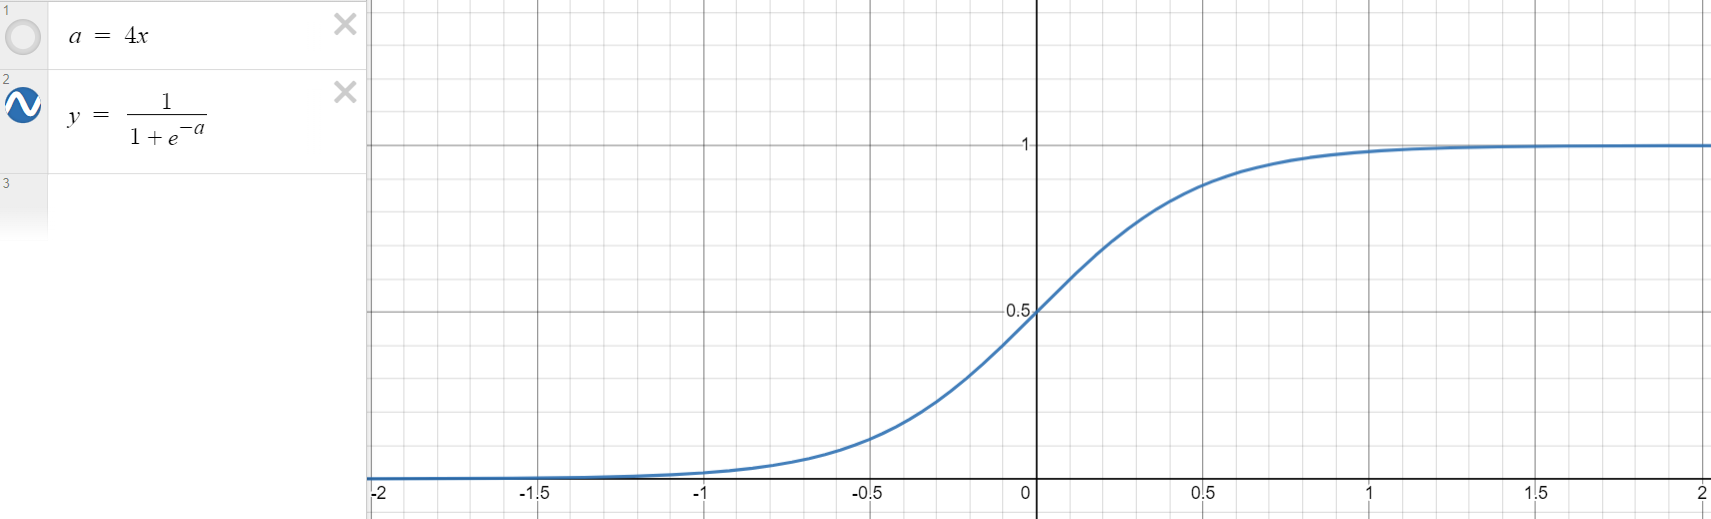

**Always remeber that the output of link function (sigmoid) is a probability**

*we define a threshold which the probability greater than the threshold belongs to class "1" and the probability less than the threshold belongs to class "0"*

***Example***

Say threshold = 0.5. Then, we calculate the link function. If the output > 0.5, then this datapoint belongs to class 1, else belongs to class 0.

***We now have the first predicted y (output) so the current step is to calculate the cost function then make gradient descent to update the weights***

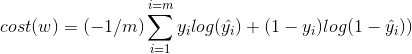

                                                         Cost function

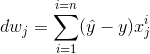

                                                           Gradient

                                                         Update weight

## The math intuition of link function

*Conditional probability is the math behind link function*

**Important links**

* https://medium.com/analytics-vidhya/logistic-regression-b35d2801a29c
* https://towardsdatascience.com/an-introduction-to-gradient-descent-and-backpropagation-81648bdb19b2

## Let's code and apply that on real data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns

In [2]:
df = pd.read_csv("data/Social_Network_Ads.csv")
df.head(n=10)

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
5,15728773,Male,27,58000,0
6,15598044,Female,27,84000,0
7,15694829,Female,32,150000,1
8,15600575,Male,25,33000,0
9,15727311,Female,35,65000,0


In [3]:
missing = df.isnull().sum()
missing

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [4]:
df.shape

(400, 5)

**Define inputs and outputs**

In [5]:
X = df.iloc[:, 1:4]
y = df["Purchased"]

In [6]:
X.head()

,Gender,Age,EstimatedSalary
0,Male,19,19000
1,Male,35,20000
2,Female,26,43000
3,Female,27,57000
4,Male,19,76000


In [7]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Purchased, dtype: int64

**Encoding the gender feature**

In [8]:
X = pd.get_dummies(X)
X

,Age,EstimatedSalary,Gender_Female,Gender_Male
0,19,19000,0,1
1,35,20000,0,1
2,26,43000,1,0
3,27,57000,1,0
4,19,76000,0,1
...,...,...,...,...
395,46,41000,1,0
396,51,23000,0,1
397,50,20000,1,0
398,36,33000,0,1


**Scatterplot (To see the relations between data)**

C:\Users\Omar\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Omar\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


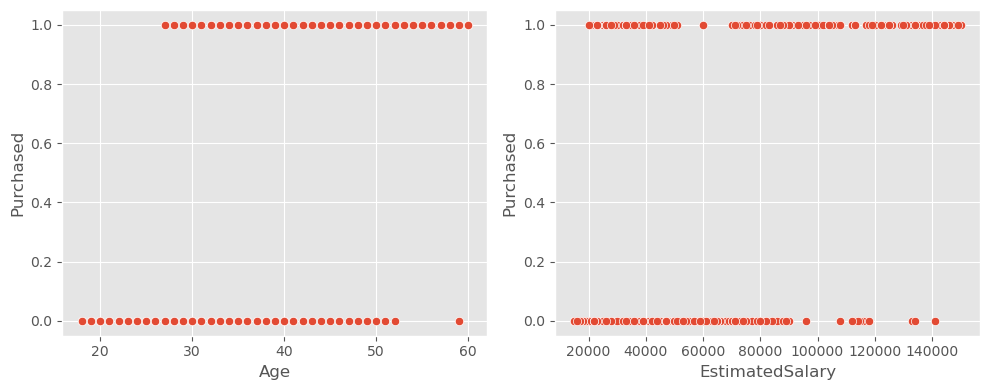

In [9]:
plt.style.use('ggplot')
fig = plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
sns.scatterplot(X["Age"], y)
plt.subplot(1,2,2)
sns.scatterplot(X["EstimatedSalary"], y)
plt.tight_layout()
plt.show()

**Histograms and kde plots (To explore distributions)**

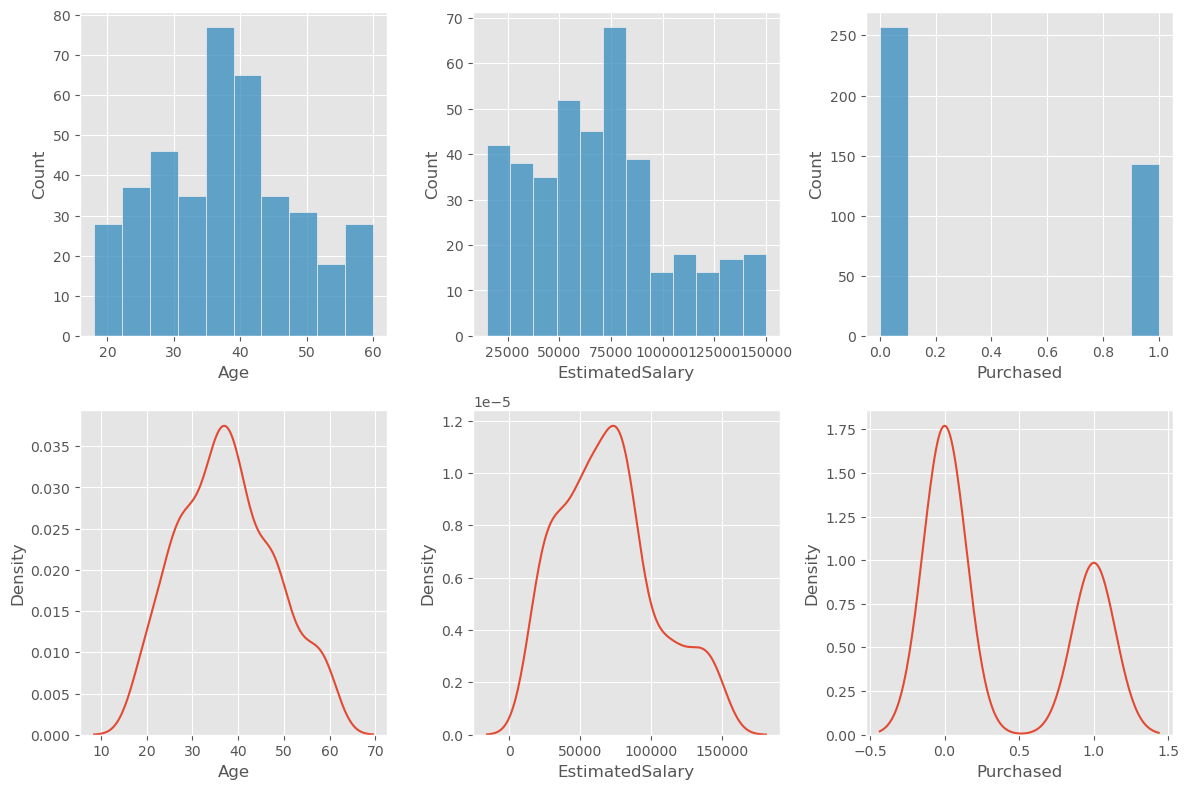

In [10]:
fig = plt.figure(figsize=(12,8))
plt.subplot(2,3,1)
sns.histplot(X["Age"])
plt.subplot(2,3,2)
sns.histplot(X["EstimatedSalary"])
plt.subplot(2,3,3)
sns.histplot(y)
plt.subplot(2,3,4)
sns.kdeplot(X["Age"])
plt.subplot(2,3,5)
sns.kdeplot(X["EstimatedSalary"])
plt.subplot(2,3,6)
sns.kdeplot(y)
plt.tight_layout()
plt.show()

**Split into training and testing datasets**

In [11]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

**Scaling the data to be in the range of [0,1] (normalize the data)**

In [12]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [13]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

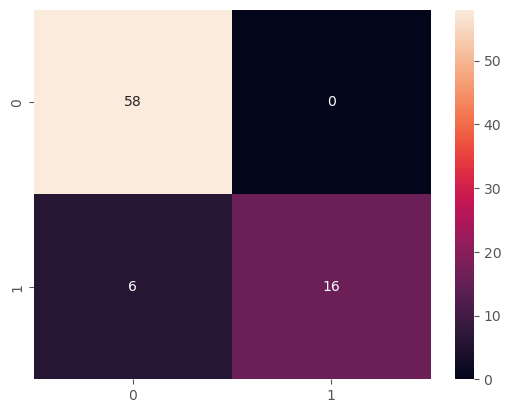

In [14]:
from sklearn.metrics import accuracy_score, confusion_matrix

y_pred_test = model.predict(X_test)
cm = confusion_matrix(y_test, y_pred_test)
sns.heatmap(cm, annot=True)
plt.show()

In [15]:
acc = accuracy_score(y_test, y_pred_test)
print(acc)

0.925
